# **Task-1 Web scraping and analysis**

### ***Completed By - Arth I Jani***

In [1]:
import requests
from bs4 import BeautifulSoup
import pandas as pd

In [2]:
base_url = "https://www.airlinequality.com/airline-reviews/british-airways"
pages = 10
page_size = 100
reviews = []

for i in range(1, pages + 1):

    print(f"Scraping page {i}")
    url = f"{base_url}/page/{i}/?sortby=post_date%3ADesc&pagesize={page_size}"

    response = requests.get(url)

    # Parse content
    content = response.content
    parsed_content = BeautifulSoup(content, 'html.parser')
    for para in parsed_content.find_all("div", {"class": "text_content"}):
        reviews.append(para.get_text())
    
    print(f"   ---> {len(reviews)} total reviews")

Scraping page 1
   ---> 100 total reviews
Scraping page 2
   ---> 200 total reviews
Scraping page 3
   ---> 300 total reviews
Scraping page 4
   ---> 400 total reviews
Scraping page 5
   ---> 500 total reviews
Scraping page 6
   ---> 600 total reviews
Scraping page 7
   ---> 700 total reviews
Scraping page 8
   ---> 800 total reviews
Scraping page 9
   ---> 900 total reviews
Scraping page 10
   ---> 1000 total reviews


In [3]:
df = pd.DataFrame()
df["reviews"] = reviews
df.head()

,reviews
0,✅ Trip Verified | The worst experience in all ...
1,✅ Trip Verified | The worst experience in all...
2,✅ Trip Verified | A serious medical problem a...
3,✅ Trip Verified | I haven't flown British Air...
4,Not Verified | My itinerary was supposed to b...


In [4]:
#Removing the parts before | in the reviews column
df.reviews= df.reviews.str.split('|',expand=True)[1]
df

,reviews
0,The worst experience in all my years of trave...
1,The worst experience in all my years of trav...
2,A serious medical problem appeared while I w...
3,I haven't flown British Airways before and w...
4,My itinerary was supposed to be Las Vegas-Ch...
...,...
995,I thought it time BA deserved some complimen...
996,Faro to Gatwick. Club check in was fairly qu...
997,Gatwick to Faro. Club check in at Gatwick is...
998,Jeddah to Chicago via London. The flight fro...


## **Step 1: Cleaning the text**

In [5]:
import re

def clean(text):
# Removes all special characters and numericals leaving the alphabets
    text = re.sub('[^A-Za-z]+', ' ', str(text))
    return text

# Cleaning the text in the review column
df['Cleaned Reviews'] = df['reviews'].apply(clean)
df.head()

,reviews,Cleaned Reviews
0,The worst experience in all my years of trave...,The worst experience in all my years of trave...
1,The worst experience in all my years of trav...,The worst experience in all my years of trave...
2,A serious medical problem appeared while I w...,A serious medical problem appeared while I wa...
3,I haven't flown British Airways before and w...,I haven t flown British Airways before and wi...
4,My itinerary was supposed to be Las Vegas-Ch...,My itinerary was supposed to be Las Vegas Chi...


In [6]:
import nltk

nltk.download('punkt')
from nltk.tokenize import word_tokenize
from nltk import pos_tag
nltk.download('stopwords')
from nltk.corpus import stopwords
nltk.download('wordnet')
from nltk.corpus import wordnet

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


## **Step 2: Tokenization**

## **Step 3: Enrichment – POS tagging**

## **Step 4: Stopwords removal**

## **Step 5: Obtaining the stem words**


In [7]:
nltk.download('omw-1.4')
nltk.download('averaged_perceptron_tagger')

# POS tagger dictionary
pos_dict = {'J':wordnet.ADJ, 'V':wordnet.VERB, 'N':wordnet.NOUN, 'R':wordnet.ADV}
def token_stop_pos(text):
    tags = pos_tag(word_tokenize(text))
    newlist = []
    for word, tag in tags:
        if word.lower() not in set(stopwords.words('english')):
          newlist.append(tuple([word, pos_dict.get(tag[0])]))
    return newlist 

df['POS tagged'] = df['Cleaned Reviews'].apply(token_stop_pos)
df.head()

[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.


,reviews,Cleaned Reviews,POS tagged
0,The worst experience in all my years of trave...,The worst experience in all my years of trave...,"[(worst, a), (experience, n), (years, n), (tra..."
1,The worst experience in all my years of trav...,The worst experience in all my years of trave...,"[(worst, a), (experience, n), (years, n), (tra..."
2,A serious medical problem appeared while I w...,A serious medical problem appeared while I wa...,"[(serious, a), (medical, a), (problem, n), (ap..."
3,I haven't flown British Airways before and w...,I haven t flown British Airways before and wi...,"[(flown, a), (British, a), (Airways, n), (neve..."
4,My itinerary was supposed to be Las Vegas-Ch...,My itinerary was supposed to be Las Vegas Chi...,"[(itinerary, n), (supposed, v), (Las, n), (Veg..."


In [8]:
# Obtaining the stem words – Lemmatization

from nltk.stem import WordNetLemmatizer
wordnet_lemmatizer = WordNetLemmatizer()
def lemmatize(pos_data):
    lemma_rew = " "
    for word, pos in pos_data:
     if not pos:
        lemma = word
        lemma_rew = lemma_rew + " " + lemma
     else:
        lemma = wordnet_lemmatizer.lemmatize(word, pos=pos)
        lemma_rew = lemma_rew + " " + lemma
    return lemma_rew

df['Lemma'] = df['POS tagged'].apply(lemmatize)
df.head()

,reviews,Cleaned Reviews,POS tagged,Lemma
0,The worst experience in all my years of trave...,The worst experience in all my years of trave...,"[(worst, a), (experience, n), (years, n), (tra...",bad experience year travel first flight two ...
1,The worst experience in all my years of trav...,The worst experience in all my years of trave...,"[(worst, a), (experience, n), (years, n), (tra...",bad experience year travel Bag destroy fligh...
2,A serious medical problem appeared while I w...,A serious medical problem appeared while I wa...,"[(serious, a), (medical, a), (problem, n), (ap...",serious medical problem appear onboard infor...
3,I haven't flown British Airways before and w...,I haven t flown British Airways before and wi...,"[(flown, a), (British, a), (Airways, n), (neve...",flown British Airways never fly check proces...
4,My itinerary was supposed to be Las Vegas-Ch...,My itinerary was supposed to be Las Vegas Chi...,"[(itinerary, n), (supposed, v), (Las, n), (Veg...",itinerary suppose Las Vegas Chicago London V...


In [9]:
df[['reviews','Lemma']]

,reviews,Lemma
0,The worst experience in all my years of trave...,bad experience year travel first flight two ...
1,The worst experience in all my years of trav...,bad experience year travel Bag destroy fligh...
2,A serious medical problem appeared while I w...,serious medical problem appear onboard infor...
3,I haven't flown British Airways before and w...,flown British Airways never fly check proces...
4,My itinerary was supposed to be Las Vegas-Ch...,itinerary suppose Las Vegas Chicago London V...
...,...,...
995,I thought it time BA deserved some complimen...,think time BA deserve compliment give many n...
996,Faro to Gatwick. Club check in was fairly qu...,Faro Gatwick Club check fairly quick priorit...
997,Gatwick to Faro. Club check in at Gatwick is...,Gatwick Faro Club check Gatwick quick easy f...
998,Jeddah to Chicago via London. The flight fro...,Jeddah Chicago via London flight Jeddah Heat...


## **Sentiment Analysis using VADER**

VADER stands for Valence Aware Dictionary and Sentiment Reasoner.

Vader sentiment not only tells if the statement is positive or negative along with the intensity of emotion.

In [10]:
!pip install vaderSentiment

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 126.0/126.0 kB 7.0 MB/s eta 0:00:00


In [11]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

def vadersentimentanalysis(review):
    vs = analyzer.polarity_scores(review)
    return vs['compound']

df['Sentiment'] = df['Lemma'].apply(vadersentimentanalysis)

def vader_analysis(compound):
    if compound >= 0.5:
        return 'Positive'
    elif compound < 0 :
        return 'Negative'
    else:
        return 'Neutral'
df['Analysis'] = df['Sentiment'].apply(vader_analysis)
df.head()

,reviews,Cleaned Reviews,POS tagged,Lemma,Sentiment,Analysis
0,The worst experience in all my years of trave...,The worst experience in all my years of trave...,"[(worst, a), (experience, n), (years, n), (tra...",bad experience year travel first flight two ...,-0.8910,Negative
1,The worst experience in all my years of trav...,The worst experience in all my years of trave...,"[(worst, a), (experience, n), (years, n), (tra...",bad experience year travel Bag destroy fligh...,-0.9186,Negative
2,A serious medical problem appeared while I w...,A serious medical problem appeared while I wa...,"[(serious, a), (medical, a), (problem, n), (ap...",serious medical problem appear onboard infor...,-0.4588,Negative
3,I haven't flown British Airways before and w...,I haven t flown British Airways before and wi...,"[(flown, a), (British, a), (Airways, n), (neve...",flown British Airways never fly check proces...,-0.7584,Negative
4,My itinerary was supposed to be Las Vegas-Ch...,My itinerary was supposed to be Las Vegas Chi...,"[(itinerary, n), (supposed, v), (Las, n), (Veg...",itinerary suppose Las Vegas Chicago London V...,-0.8271,Negative


In [12]:
vader_counts = df['Analysis'].value_counts()
vader_counts

Positive    517
Negative    377
Neutral     106
Name: Analysis, dtype: int64

## **Visual Representation**

([<matplotlib.patches.Wedge at 0x7feb8a4bab30>,
 [Text(-0.05871992619937442, 1.0984315956249346, 'Positive'),
  Text(-0.3035700275762696, -1.0572820051232041, 'Negative'),
  Text(1.275835215204122, -0.44129865583870975, 'Neutral')],
 [Text(-0.03202905065420423, 0.5991445067045098, '51.7%'),
  Text(-0.16558365140523795, -0.5766992755217476, '37.7%'),
  Text(0.80330365401741, -0.27785470923178024, '10.6%')])

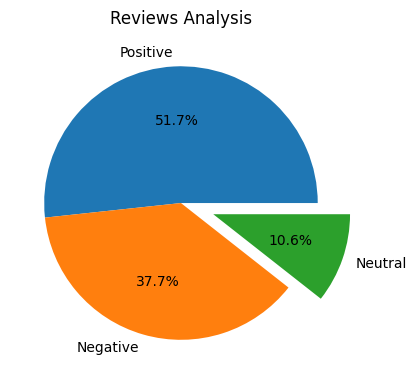

In [13]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.figure(figsize=(15,7))

plt.subplot(1,3,2)
plt.title("Reviews Analysis")
plt.pie(vader_counts.values, labels = vader_counts.index, explode = (0, 0, 0.25), autopct='%1.1f%%', shadow=False)

Storing the reviews data in a CSV File.

In [14]:
df.to_csv("BA_reviews.csv")

## **Wordcloud**

Word Cloud or Tag Clouds is a visualization technique for texts that are natively used for visualizing the tags or keywords from the websites

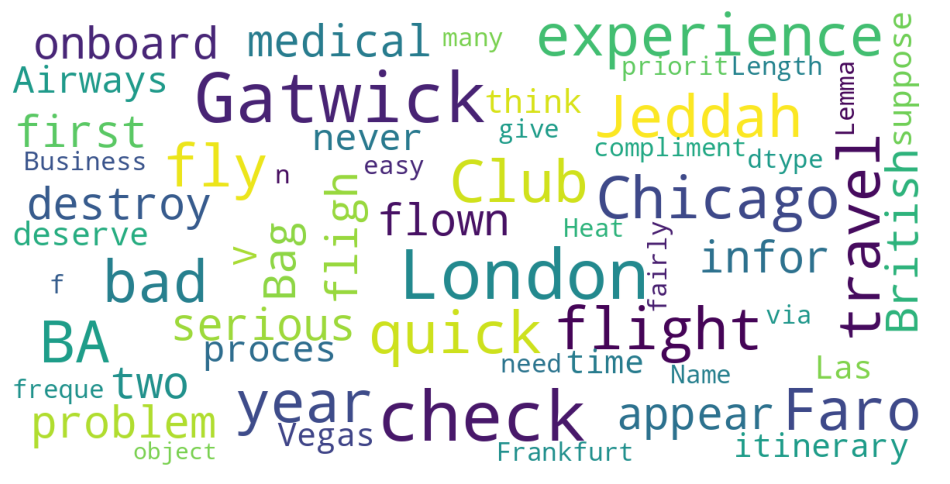

In [15]:
from wordcloud import WordCloud, STOPWORDS
stopwords = set(STOPWORDS)

def show_wordcloud(data):
    wordcloud = WordCloud(
        background_color='white',
        stopwords=stopwords,
        max_words=100,
        max_font_size=30,
        scale=3,
        random_state=1)

    wordcloud=wordcloud.generate(str(data))

    fig = plt.figure(1, figsize=(12, 12))
    plt.axis('off')

    plt.imshow(wordcloud)
    plt.show()

show_wordcloud(df.Lemma)